# Support Vector Regression

This Support Vector Regression is linear, in SVR instead of a line running across the points, we use a tube, which covers a lot of points, we disregard any kind of errors, it basically gives us a buffer. 

But the points not in the tube is considered as errors, the points above the tube is Slack Variable, and the ones below is Slack Variable*. 

We need to minimize the errors which can be achieved by formulae.

**It is called Support Vector Regression because techically all the points outside are vectors, we call them as support vectors because these are the ones that dictate the structure of the tube in the graph.**

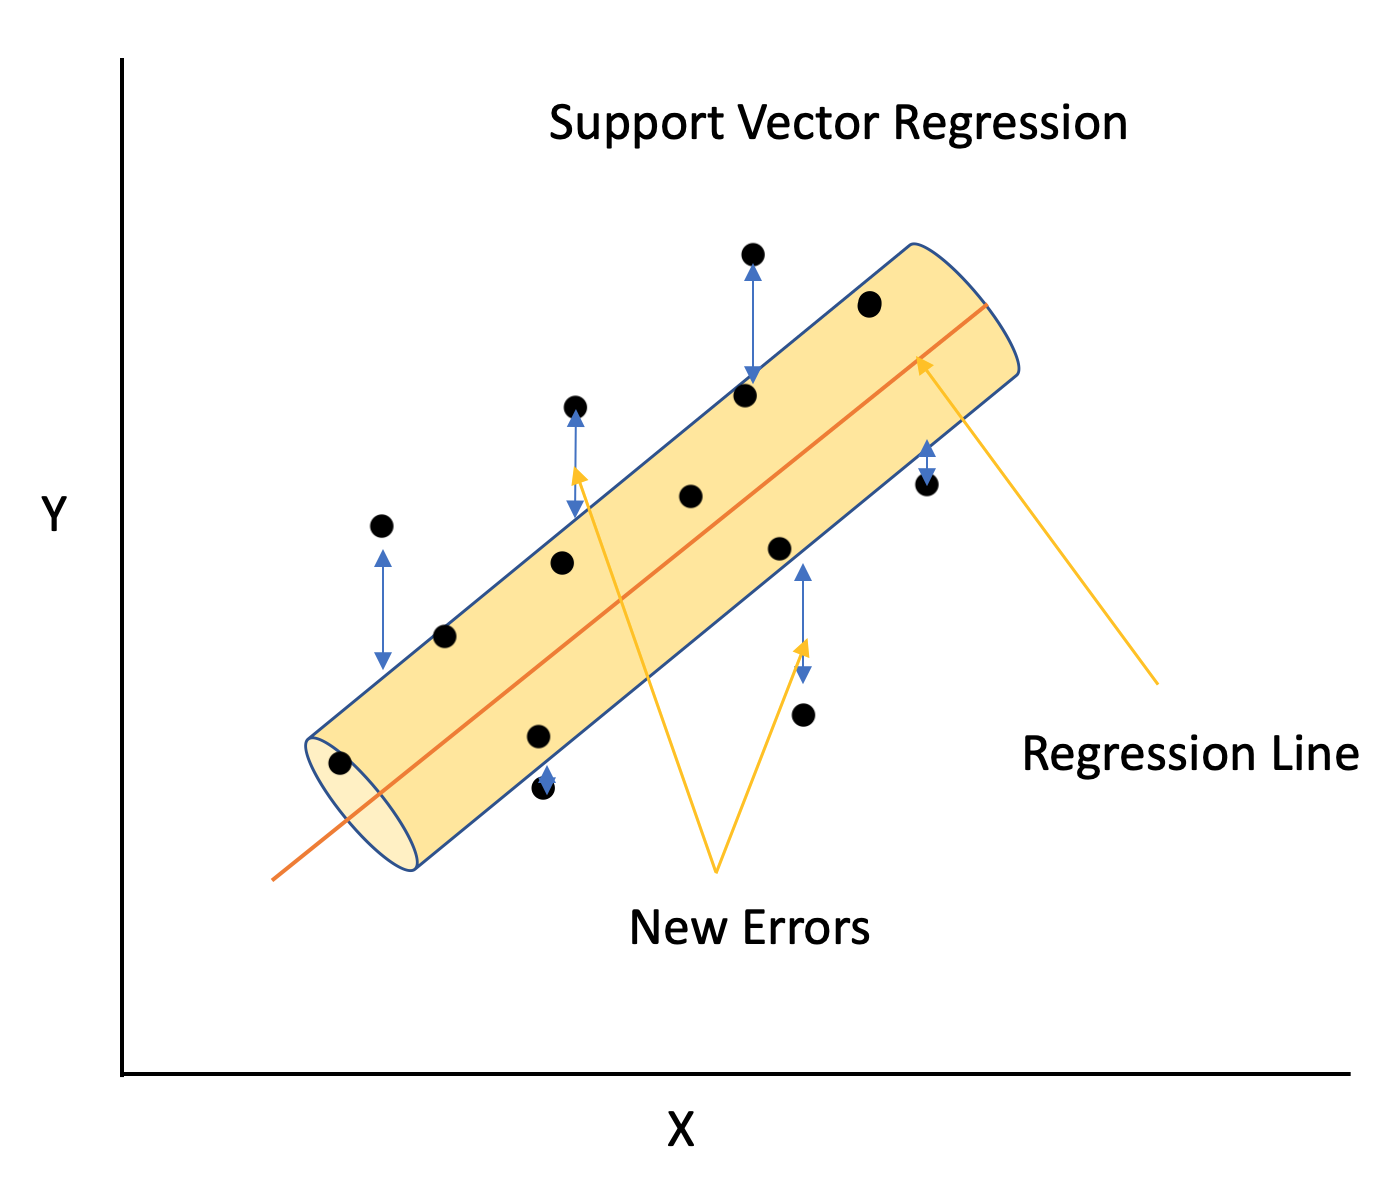

This time, in SVR we have to apply feature scaling as there is no explicit equation of the dependent variable with respect to the features. There are no coefficients multiplying each of the features and therefore not compensating with lower values for the features taking high values.

Support vector regression model has an implicit equation meaning we don't have such coefficients and we will have to apply feature scaling.

## Code

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values.ravel()
# ravel is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array

In [14]:
#now we have to reshape the labels because Scaler property,
#expects a 2D array
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [15]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y= StandardScaler() #scaling y values because level and salary aren't on the same scale
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [16]:
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [17]:
#Training the SVR model after feature scaling
from sklearn.svm import SVR
model = SVR(kernel= 'rbf') 
# we have to tell the model about what kind of data we are giving
#is it linear or not, in our case it is non linear model
model.fit(x,y)

C:\Users\YASHRAJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [18]:
# model.predict([[6.5]])
# this value isnt scaled and so we have to scale it according to how we scaled the features
# we have to invert back to actual scale
sc_y.inverse_transform(model.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

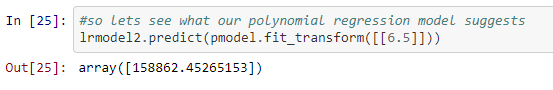

The above value was what our Polynomial Regression model suggested.

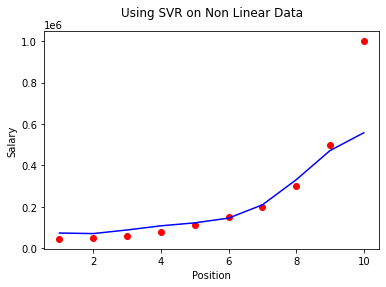

In [19]:
#Visualization
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),c='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(model.predict(x)),c='blue')
plt.title("Using SVR on Non Linear Data",pad=15)
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()